In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
from tensorflow.random import set_seed

np.random.seed(42)
set_seed(42)

# Uploading the Dataset

In [4]:
# from google.colab import files
# uploaded = files.upload()

# import io
# df = pd.read_csv(io.BytesIO(uploaded['houses_1.csv']))

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
file_dir = "/content/drive/MyDrive/Colab Notebooks/houses_1.csv"
df = pd.read_csv(file_dir)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
n_samples , n_columns = df.shape
print(f"Number of rows(samples): {n_samples}\nNumber of features: {n_columns}")

print(f"List of features'names: {df.columns.values}")

Number of rows(samples): 21613
Number of features: 21
List of features'names: ['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


# Heat Map Correlation

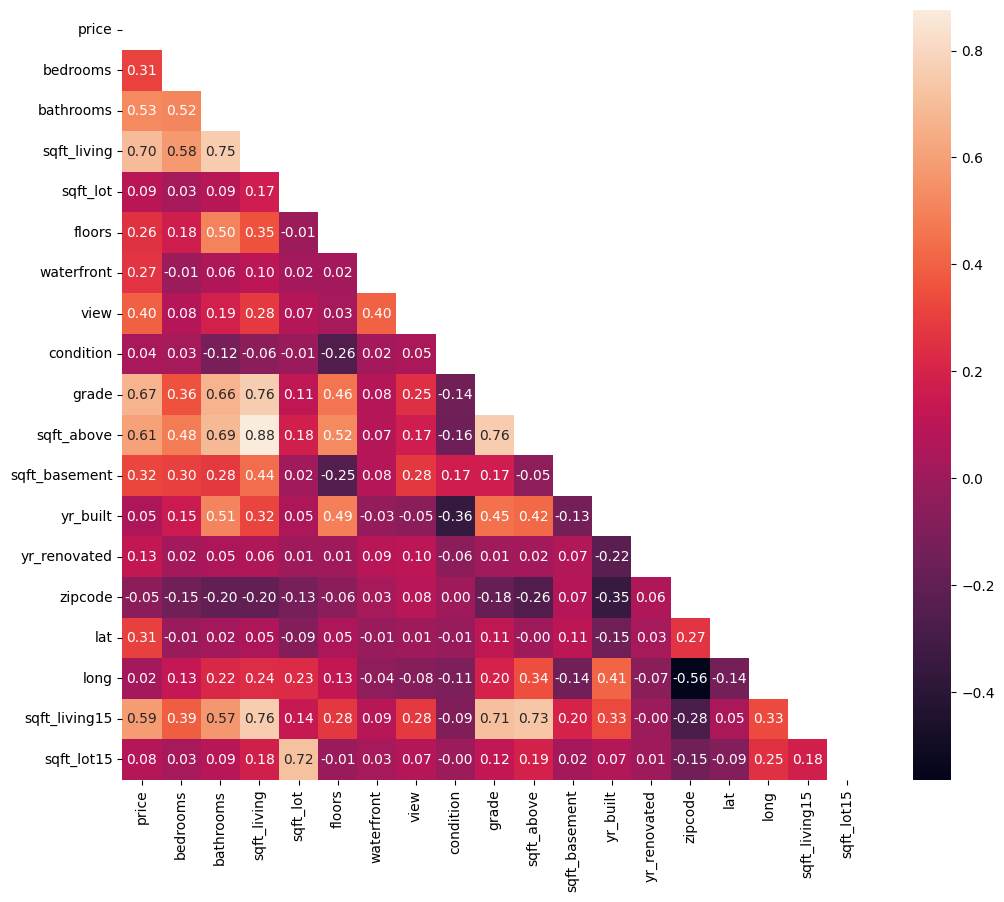

In [8]:
from google.colab import files
plt.rcParams['axes.grid'] = False

df_corr = df.drop(['date',"id"], axis = 1)

fig, ax = plt.subplots(figsize=(12,10))
mask = np.triu(np.ones_like(df_corr.corr()))
sns.heatmap(df_corr.corr(), annot=True, square= False ,linecolor='blue' ,fmt=".2f",mask=mask)
plt.savefig('HW4 - Heat map of correlations between features.png')
plt.show()

#files.download( "HW4 - Heat map of correlations between features.png" )    

# Splitting data to the output and the feature space

In [9]:
y = df['price'].to_numpy()
X = df.drop(['price','date'], axis = 1).to_numpy()

# Distribution of 'Price' visualization
# Mean and std of 'Price'



<ipython-input-10-7321139afcba>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(a=y_hist, bins=150, hist=True, kde=True, kde_kws=dict(linewidth=1.5),hist_kws=dict(edgecolor="black", linewidth=1))


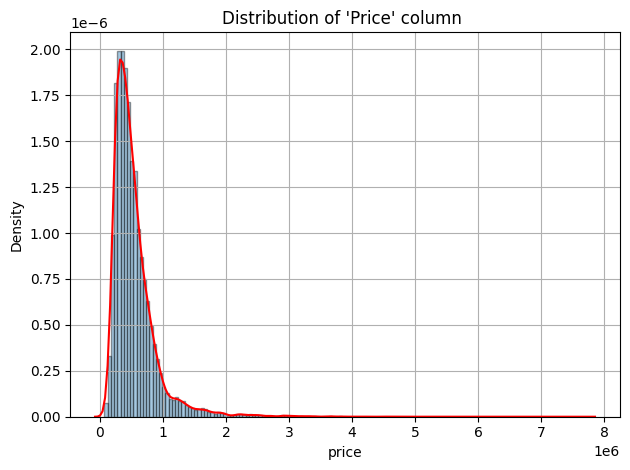

In [10]:
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.autolayout"] = True

y_hist = df['price']
X_hist = df.drop(['price','date'], axis = 1)
ax = sns.distplot(a=y_hist, bins=150, hist=True, kde=True, kde_kws=dict(linewidth=1.5),hist_kws=dict(edgecolor="black", linewidth=1))
ax.lines[0].set_color('red')
plt.savefig('HW4 - Distribution of [price] column.png')
plt.title("Distribution of 'Price' column ")
#files.download( "HW4 - Distribution of [price] column.png" )    
plt.show()

[[540088.14176653 367118.70318137]]


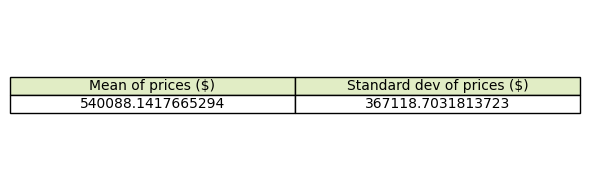

In [11]:
jjj = np.array([[y.mean(),y.std()]])
print(jjj)
meanstd = pd.DataFrame(jjj, columns= ['Mean of prices ($)','Standard dev of prices ($)'])
fig, ax0 = plt.subplots(figsize = (6,2))
ax0.table(cellText=meanstd.values, colLabels=meanstd.columns, loc='center', cellLoc='center',colColours=['#e1edc5','#e1edc5'], rowLoc='center')

fig.patch.set_visible(False)
ax0.axis('off')
ax0.axis('tight')
fig.tight_layout()
plt.show()

# Splitting "Year" & "Month" of data and adding them to new columns

In [12]:
count2 = 0
for item in df['date']:
  #print(item)
  #print(type(item))
  count1 = 0
  for letter in item:
    count1 +=1
  #print(count1)
  if count1 != 15:
    break
  count2 += 1
print(count2)

## All the strings in "date" column consist of 15 letters

21613


In [13]:
year = []
month = []

for item in df['date']:
  item_year = int(item[:4])
  item_month = int(item[4:6])
  month.append(item_month)
  year.append(item_year)
  #print(item_year)
  #print(item_month)

print(len(month))
print(len(year))
print(type(year[1]))
df['year'] = year
# print(df['year'].unique())
# print(df['year'].nunique())

df['month'] = month
# print(df['month'].unique())
# print(df['month'].nunique())

21613
21613
<class 'int'>


In [14]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [15]:
X

array([[ 7.12930052e+09,  3.00000000e+00,  1.00000000e+00, ...,
        -1.22257000e+02,  1.34000000e+03,  5.65000000e+03],
       [ 6.41410019e+09,  3.00000000e+00,  2.25000000e+00, ...,
        -1.22319000e+02,  1.69000000e+03,  7.63900000e+03],
       [ 5.63150040e+09,  2.00000000e+00,  1.00000000e+00, ...,
        -1.22233000e+02,  2.72000000e+03,  8.06200000e+03],
       ...,
       [ 1.52330014e+09,  2.00000000e+00,  7.50000000e-01, ...,
        -1.22299000e+02,  1.02000000e+03,  2.00700000e+03],
       [ 2.91310100e+08,  3.00000000e+00,  2.50000000e+00, ...,
        -1.22069000e+02,  1.41000000e+03,  1.28700000e+03],
       [ 1.52330016e+09,  2.00000000e+00,  7.50000000e-01, ...,
        -1.22299000e+02,  1.02000000e+03,  1.35700000e+03]])

# Min & Max of the data

Minimum price of a house is 75000.0 and maximum price of a house is reported 7700000.0



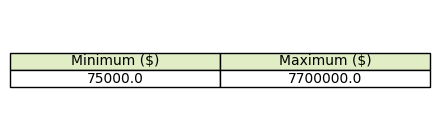

In [16]:
print(f"Minimum price of a house is {y.min()} and maximum price of a house is reported {y.max()}\n")
ccc = np.array([[y.min(),y.max()]])
minmax = pd.DataFrame(ccc, columns= ['Minimum ($)','Maximum ($)'])
fig, ax = plt.subplots(figsize = (4.5,1.5))
#print(minmax)
ax.table(cellText=minmax.values, colLabels=minmax.columns, loc='center', cellLoc='center',colColours=['#e1edc5','#e1edc5'], rowLoc='center')
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
fig.tight_layout()
plt.show()

# Train & Test splitting of data 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
               y, test_size=0.2, random_state=4)

print(X_train.shape ,X_test.shape , y_train.shape , y_test.shape)

(17290, 19) (4323, 19) (17290,) (4323,)


# Scaling the features and the labels

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
print(X_train_scale)

scaler.fit(X_test)
X_test_scale = scaler.transform(X_test)

scaler.fit(y_train.reshape(-1,1))
y_train_scale = scaler.transform(y_train.reshape(-1,1))
print(y_train_scale)

scaler.fit(y_test.reshape(-1,1))
y_test_scale = scaler.transform(y_test.reshape(-1,1))

print(type(y_train_scale))
print(type(X_train_scale))
print(f"The mean of y_test_scale: {y_test_scale.mean()}")
print(f"The mean of y_train_scale: {y_train_scale.mean()}")

[[0.90348524 0.06060606 0.1875     ... 0.30980066 0.25232008 0.00335079]
 [0.68584705 0.15151515 0.34375    ... 0.38953488 0.38189459 0.01409239]
 [0.94885341 0.09090909 0.125      ... 0.10548173 0.14375766 0.0051244 ]
 ...
 [0.3242449  0.12121212 0.34375    ... 0.26993355 0.34862546 0.01009832]
 [0.09061522 0.09090909 0.1875     ... 0.43189369 0.17702679 0.00812139]
 [0.09334973 0.12121212 0.25       ... 0.39036545 0.50796708 0.03862081]]
[[0.05691803]
 [0.07868852]
 [0.0452459 ]
 ...
 [0.07409836]
 [0.02459016]
 [0.1042623 ]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
The mean of y_test_scale: 0.08789638620857418
The mean of y_train_scale: 0.060952485579648996


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import plot_model
from keras.engine import input_layer

In [22]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['legend.markerscale'] = 1
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Creating the model in  a function




In [1]:
def model_cr(X_train_scale,y_train_scale,active_fun,batchsize,learning_rate,epochs,optimizer,loss):

  model = Sequential()

  model.add(Dense(64,activation = active_fun ,input_dim = X_train_scale.shape[1]))
  model.add(Dense(32,activation = active_fun))
  model.add(Dense(16,activation = active_fun))
  model.add(Dense(4, activation = active_fun))
  model.add(Dense(1, activation = 'sigmoid'))
  
  plot_model(model,show_shapes = True)
  model.summary()

  model.compile(optimizer= optimizer, loss = loss)
  history = model.fit(X_train_scale,y_train_scale , validation_split  = 0.2,  batch_size = batchsize, epochs = epochs)

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  #print(hist)

  fig = plt.figure()
  plt.title(f"Loss for learning rate of {learning_rate} and {epochs} epochs")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.plot(hist['epoch'],hist['loss'], label = 'Train Loss')
  plt.plot(hist['epoch'],hist['val_loss'], label = 'Val loss')
  plt.legend()
  plt.show()
  # plt.savefig(f"Epochs vs Loss for learning rate of {learning_rate} and {epochs} Epochs.png")
  score = model.evaluate(X_test_scale,y_test_scale)
  print(f"Score: {score}")
  
  hist_loss = hist['loss'].to_numpy()
  #print(hist_loss)
  
  print(f"Mean of error in the whole dataset: {np.sqrt(hist_loss).mean()}")

  y_pred = model.predict(X_test_scale)
  print(f"Prediction of model for y: {y_pred.reshape(1,-1)}")
 
  hist_epoch = hist['epoch'].to_numpy()
  hist_loss = hist['loss'].to_numpy()
  hist_val_loss = hist['val_loss'].to_numpy()

  return hist_epoch , hist_loss, hist_val_loss

# Losses & optimizers Definition

In [24]:
mae = tf.keras.losses.MeanAbsoluteError()
mse = tf.keras.losses.MeanSquaredError()
huber = tf.keras.losses.Huber(delta=1.0, reduction="auto")

SGD = tf.keras.optimizers.SGD(learning_rate = 0.1, clipvalue= 1.0)
SGD_opt = tf.keras.optimizers.SGD(learning_rate = 0.1, clipvalue= 1.0, momentum=0.2,nesterov=True)
Adam = tf.keras.optimizers.Adam(learning_rate = 0.1)
Adam_opt = tf.keras.optimizers.Adam(learning_rate = 0.1, clipvalue= 1.0, use_ema = True, ema_momentum = 0.85)

In [ ]:
# SGD_opt = tf.keras.optimizers.SGD(learning_rate = 0.1, clipvalue= 1.0, momentum=0.2,nesterov=True)

# epoch , loss , val_loss =  model_cr(X_train_scale,y_train_scale,'relu',64,0.1,100,SGD_opt,mse)
# plt.title(f"optimizer SGD_opt  & loss mse")
# plt.plot(epoch , loss , label = 'Train Loss')
# plt.plot(epoch , val_loss, label = 'Val loss') 
# plt.ylim((0.0004,0.0008))
# plt.legend()
# plt.show()

In [ ]:
# Adam = tf.keras.optimizers.Adam(learning_rate = 0.1)

# epoch , loss , val_loss =  model_cr(X_train_scale,y_train_scale,'relu',64,0.1,100,Adam,mse)
# plt.title(f"optimizer Adam  & loss mse")
# plt.plot(epoch , loss , label = 'Train Loss')
# plt.plot(epoch , val_loss, label = 'Val loss') 
# plt.ylim((0.00045,0.0045))
# plt.legend()
# plt.show()

# Training the Models

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,961
Trainable params: 3,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
217/217 [==============================] - 

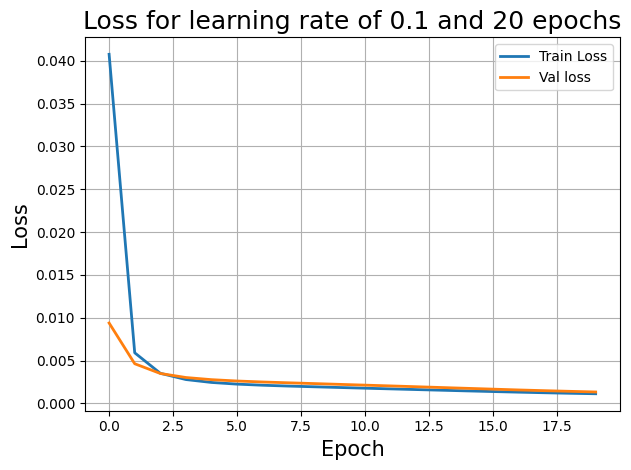

136/136 [==============================] - 0s 885us/step - loss: 0.0032
Score: 0.003236836986616254
Mean of error in the whole dataset: 0.05223303724965175
136/136 [==============================] - 0s 805us/step
Prediction of model for y: [[0.05250642 0.05985489 0.0526157  ... 0.05257795 0.07286854 0.06039173]]


In [ ]:
#SGD_opt = tf.keras.optimizers.SGD(learning_rate = 0.1, clipvalue= 1.0, momentum=0.2,nesterov=True)
SGD_opt = tf.keras.optimizers.SGD(learning_rate = 0.1, clipvalue= 1.0, momentum=0.2,nesterov=True)

epoch1 , loss1 , val_loss1 = model_cr(X_train_scale,y_train_scale,'relu',64,0.1,20,SGD_opt,mse)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1280      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 4)                 68        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,961
Trainable params: 3,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
217/217 [==============================] 

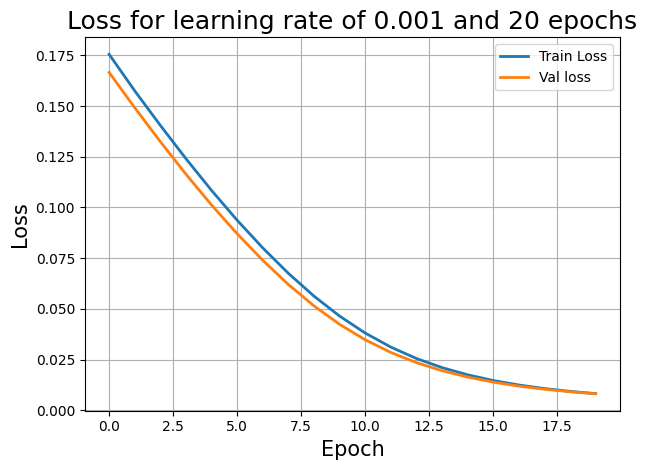

136/136 [==============================] - 0s 911us/step - loss: 0.0075
Score: 0.007503197994083166
Mean of error in the whole dataset: 0.22535621512332407
136/136 [==============================] - 0s 854us/step
Prediction of model for y: [[0.12651423 0.10941809 0.11200438 ... 0.12946586 0.15429169 0.14162791]]


In [ ]:
SGD_opt = tf.keras.optimizers.SGD(learning_rate = 0.001, clipvalue= 1.0, momentum=0.2,nesterov=True)

epoch2 , loss2 , val_loss2 = model_cr(X_train_scale,y_train_scale,'relu',64,0.001,20,SGD_opt,mse)

Streaming output truncated to the last 5000 lines.
217/217 [==============================] - 0s 2ms/step - loss: 2.2269e-04 - val_loss: 4.0273e-04
Epoch 1502/4000
217/217 [==============================] - 0s 2ms/step - loss: 2.1862e-04 - val_loss: 4.0730e-04
Epoch 1503/4000
217/217 [==============================] - 0s 2ms/step - loss: 2.1827e-04 - val_loss: 4.0626e-04
Epoch 1504/4000
217/217 [==============================] - 0s 2ms/step - loss: 2.1921e-04 - val_loss: 4.1446e-04
Epoch 1505/4000
217/217 [==============================] - 0s 2ms/step - loss: 2.1851e-04 - val_loss: 4.0626e-04
Epoch 1506/4000
217/217 [==============================] - 0s 2ms/step - loss: 2.1844e-04 - val_loss: 4.1423e-04
Epoch 1507/4000
217/217 [==============================] - 0s 2ms/step - loss: 2.1877e-04 - val_loss: 4.1424e-04
Epoch 1508/4000
217/217 [==============================] - 0s 2ms/step - loss: 2.1848e-04 - val_loss: 4.3254e-04
Epoch 1509/4000
217/217 [==============================] - 0s

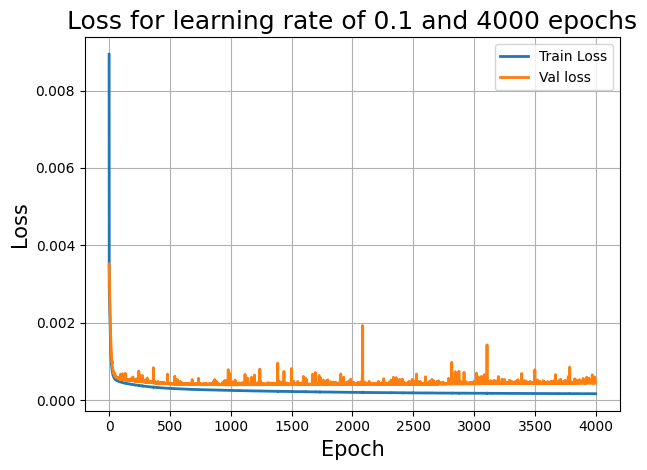

136/136 [==============================] - 0s 1ms/step - loss: 0.0027
Score: 0.0027456048410385847
Mean of error in the whole dataset: 0.015002912911954464
136/136 [==============================] - 0s 945us/step
Prediction of model for y: [[0.02427687 0.05417908 0.01546413 ... 0.0276551  0.08505844 0.07579182]]


In [ ]:
SGD_opt = tf.keras.optimizers.SGD(learning_rate = 0.1, clipvalue= 1.0, momentum=0.2,nesterov=True)

epoch3 , loss3 , val_loss3 = model_cr(X_train_scale,y_train_scale,'relu',64,0.1,4000,SGD_opt,mse)

Streaming output truncated to the last 5000 lines.
217/217 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 1502/4000
217/217 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 1503/4000
217/217 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 1504/4000
217/217 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 1505/4000
217/217 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 1506/4000
217/217 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 1507/4000
217/217 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 1508/4000
217/217 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 1509/4000
217/217 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 1510/4000
217/

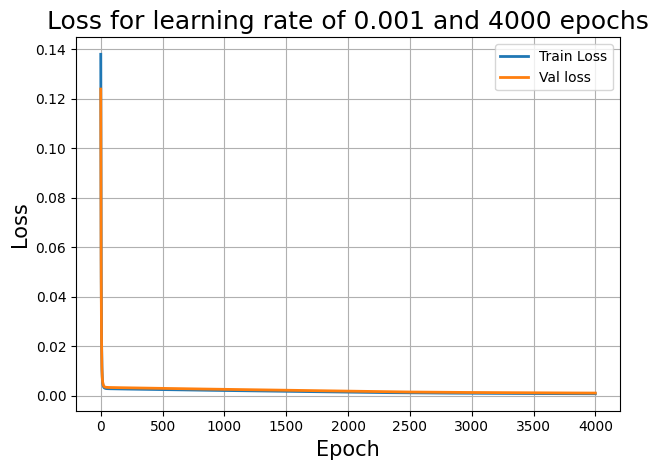

136/136 [==============================] - 0s 1ms/step - loss: 0.0029
Score: 0.002911275252699852
Mean of error in the whole dataset: 0.039711344114256995
136/136 [==============================] - 0s 876us/step
Prediction of model for y: [[0.0380833  0.05838868 0.02128331 ... 0.0285133  0.06912835 0.06850222]]


In [ ]:
SGD_opt = tf.keras.optimizers.SGD(learning_rate = 0.001, clipvalue= 1.0, momentum=0.2,nesterov=True)

epoch4 , loss4 , val_loss4 = model_cr(X_train_scale,y_train_scale,'relu',64,0.001,4000,SGD_opt,mse)

# Comparison of Results

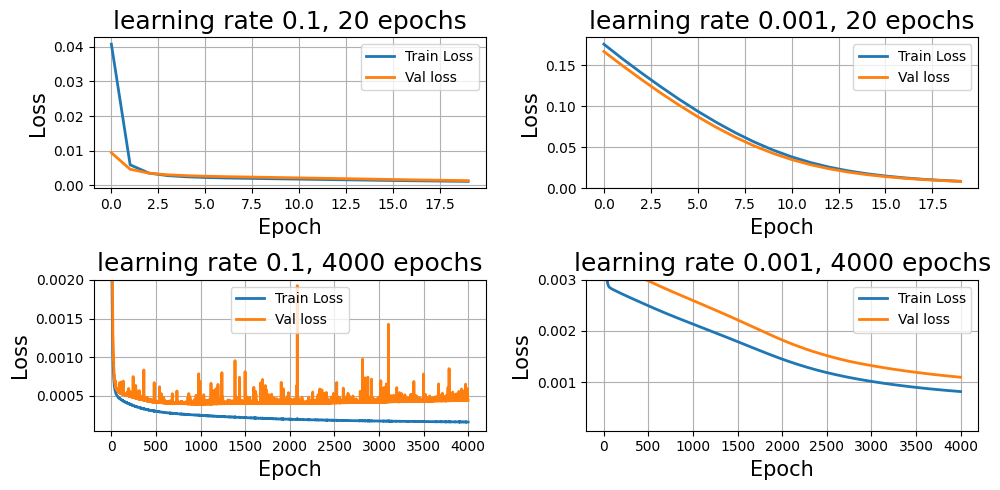

In [ ]:
learn_rate = [0.1,0.001]
ep = [20,4000]
fig , ax = plt.subplots(2,2,figsize = (10,5))
ax = ax.flatten()
ax[0].set_title(f"learning rate {learn_rate[0]}, {ep[0]} epochs")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].plot(epoch1 , loss1 , label = 'Train Loss')
ax[0].plot(epoch1 , val_loss1, label = 'Val loss') 
ax[0].legend()
#ax[0].set_ylim([0.001,0.008])
ax[1].set_title(f"learning rate {learn_rate[1]}, {ep[0]} epochs")
ax[1].plot(epoch2 , loss2 , label = 'Train Loss')
ax[1].plot(epoch2 , val_loss2, label = 'Val loss') 
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
#ax[1].set_ylim([0.002,0.02])
ax[2].set_title(f"learning rate {learn_rate[0]}, {ep[1]} epochs")
ax[2].plot(epoch3, loss3 , label = 'Train Loss')
ax[2].plot(epoch3 , val_loss3, label = 'Val loss') 
ax[2].legend()
ax[2].set_xlabel("Epoch")
ax[2].set_ylabel("Loss")
ax[2].set_ylim([0.00005,0.002])
ax[3].set_title(f"learning rate {learn_rate[1]}, {ep[1]} epochs")
ax[3].plot(epoch4 , loss4, label = 'Train Loss')
ax[3].plot(epoch4 , val_loss4, label = 'Val loss') 
ax[3].legend()
ax[3].set_xlabel("Epoch")
ax[3].set_ylabel("Loss")
ax[3].set_ylim([0.00005,0.003])

plt.show()  


(0.001, 0.03)

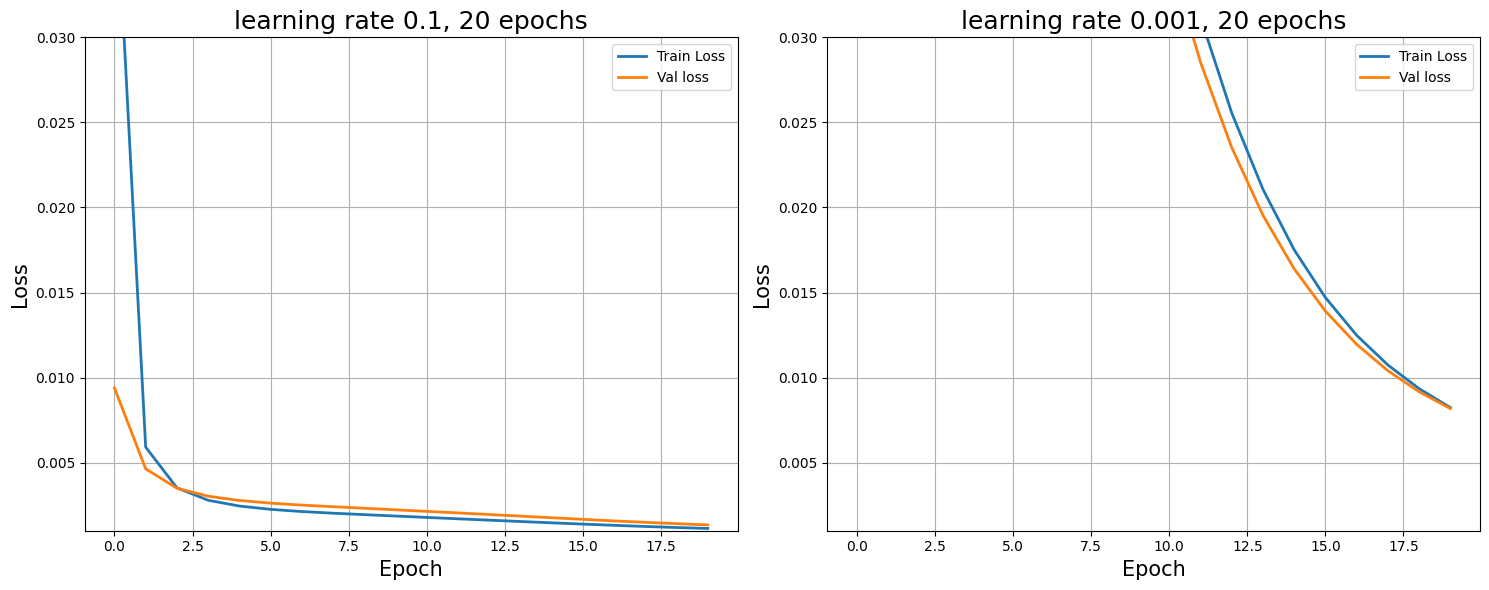

In [ ]:
learn_rate = [0.1,0.001]
ep = [20,4000]
fig , ax = plt.subplots(1,2,figsize = (15,6))
ax = ax.flatten()
ax[0].set_title(f"learning rate {learn_rate[0]}, {ep[0]} epochs")
ax[0].plot(epoch1, loss1 , label = 'Train Loss')
ax[0].plot(epoch1 , val_loss1, label = 'Val loss') 
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_ylim([0.001,0.03])
ax[1].set_title(f"learning rate {learn_rate[1]}, {ep[0]} epochs")
ax[1].plot(epoch2 , loss2, label = 'Train Loss')
ax[1].plot(epoch2 , val_loss2, label = 'Val loss') 
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].set_ylim([0.001,0.03])

# Using 'tanh' Activation Function for hidden layers of Best Model




Streaming output truncated to the last 5000 lines.
217/217 [==============================] - 1s 5ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 1502/4000
217/217 [==============================] - 1s 4ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 1503/4000
217/217 [==============================] - 1s 4ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 1504/4000
217/217 [==============================] - 1s 5ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 1505/4000
217/217 [==============================] - 1s 5ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 1506/4000
217/217 [==============================] - 1s 5ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 1507/4000
217/217 [==============================] - 1s 4ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 1508/4000
217/217 [==============================] - 1s 3ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 1509/4000
217/217 [==============================] - 1s 4ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 1510/4000
217/

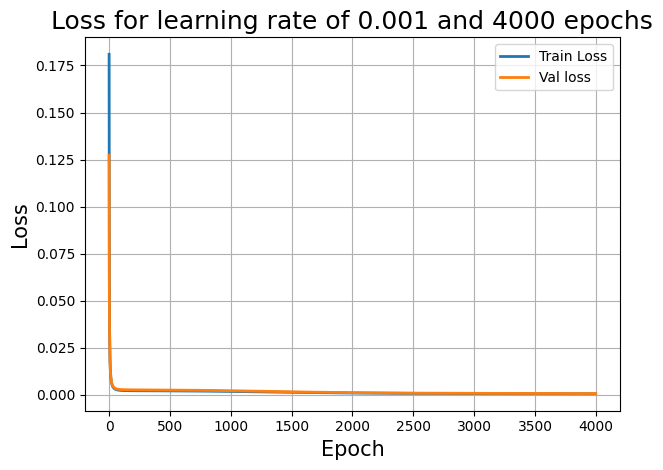

136/136 [==============================] - 0s 2ms/step - loss: 0.0025
Score: 0.0025349275674670935
Mean of error in the whole dataset: 0.03517106877122594
136/136 [==============================] - 0s 2ms/step
Prediction of model for y: [[0.0362183  0.05601338 0.02710247 ... 0.03088837 0.06297386 0.06357326]]


In [ ]:
SGD_opt = tf.keras.optimizers.SGD(learning_rate = 0.001, clipvalue= 1.0, momentum=0.2,nesterov=True)

epoch_tanh , loss_tanh , val_loss_tanh = model_cr(X_train_scale,y_train_scale,'tanh',64,0.001,4000,SGD_opt,mse)

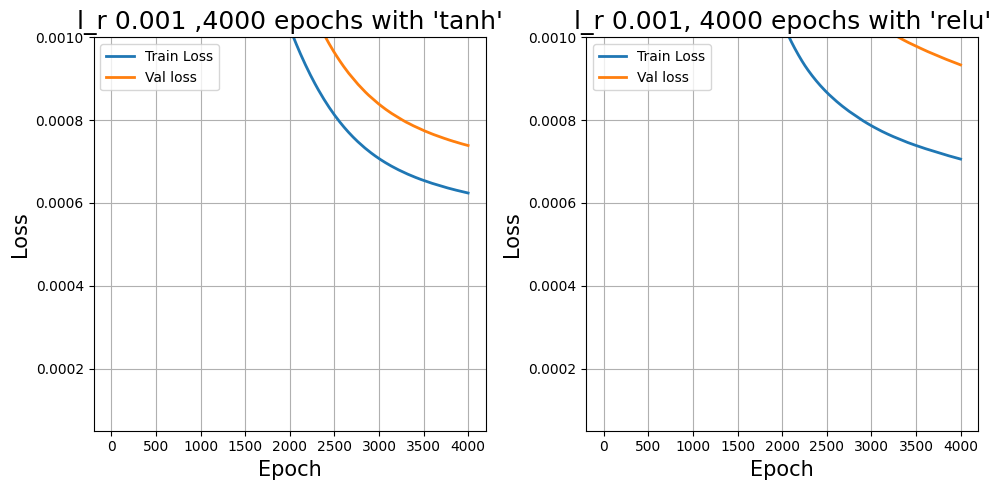

In [ ]:
fig2 , ax2 = plt.subplots(1,2,figsize = (10,5))
ax2 = ax2.flatten()
ax2[0].set_title(f"l_r 0.001 ,4000 epochs with 'tanh'")
ax2[0].set_xlabel("Epoch")
ax2[0].set_ylabel("Loss")
ax2[0].plot(epoch_tanh , loss_tanh , label = 'Train Loss')
ax2[0].plot(epoch_tanh , val_loss_tanh, label = 'Val loss') 
ax2[0].legend()
ax2[0].set_ylim([0.00005,0.001])
ax2[1].set_title(f"l_r 0.001, 4000 epochs with 'relu'")
ax2[1].plot(epoch4 , loss4 , label = 'Train Loss')
ax2[1].plot(epoch4 , val_loss4, label = 'Val loss') 
ax2[1].legend()
ax2[1].set_xlabel("Epoch")
ax2[1].set_ylabel("Loss")
ax2[1].set_ylim([0.00005,0.001])
plt.show()

# Using different batch sizes for best model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,961
Trainable params: 3,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
55/55 [==============================] - 2

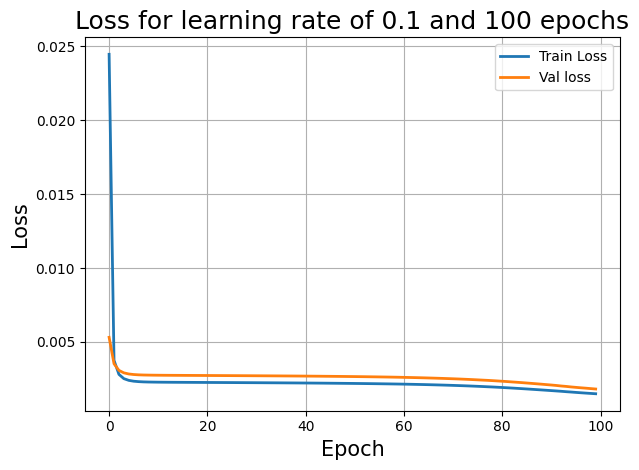

136/136 [==============================] - 0s 2ms/step - loss: 0.0035
Score: 0.0035001817159354687
Mean of error in the whole dataset: 0.04708621628934556
136/136 [==============================] - 0s 1ms/step
Prediction of model for y: [[0.05303101 0.06727525 0.04824615 ... 0.06206175 0.07051564 0.05583742]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1280      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 4)                 68        
                                                                 
 dense_

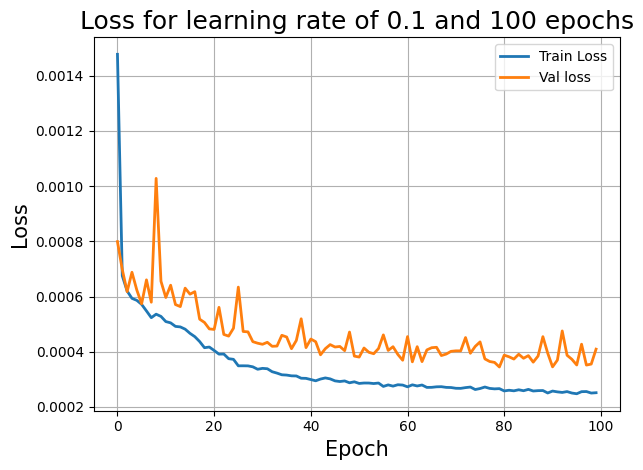

136/136 [==============================] - 0s 1ms/step - loss: 0.0024
Score: 0.0023591096978634596
Mean of error in the whole dataset: 0.01829201248134598
136/136 [==============================] - 0s 1ms/step
Prediction of model for y: [[0.02695618 0.06106851 0.03032384 ... 0.02243082 0.07271516 0.06613236]]


In [25]:
SGD_opt = tf.keras.optimizers.SGD(learning_rate = 0.1, clipvalue= 1.0, momentum=0.2,nesterov=True)

epoch_tanh_256 , loss_tanh_256 , val_loss_tanh_256 = model_cr(X_train_scale,y_train_scale,'tanh',256,0.1,100,SGD_opt,mse)


SGD_opt = tf.keras.optimizers.SGD(learning_rate = 0.1, clipvalue= 1.0, momentum=0.2,nesterov=True)

epoch_tanh_1 , loss_tanh_1 , val_loss_tanh_1 = model_cr(X_train_scale,y_train_scale,'tanh',1,0.1,100,SGD_opt,mse)

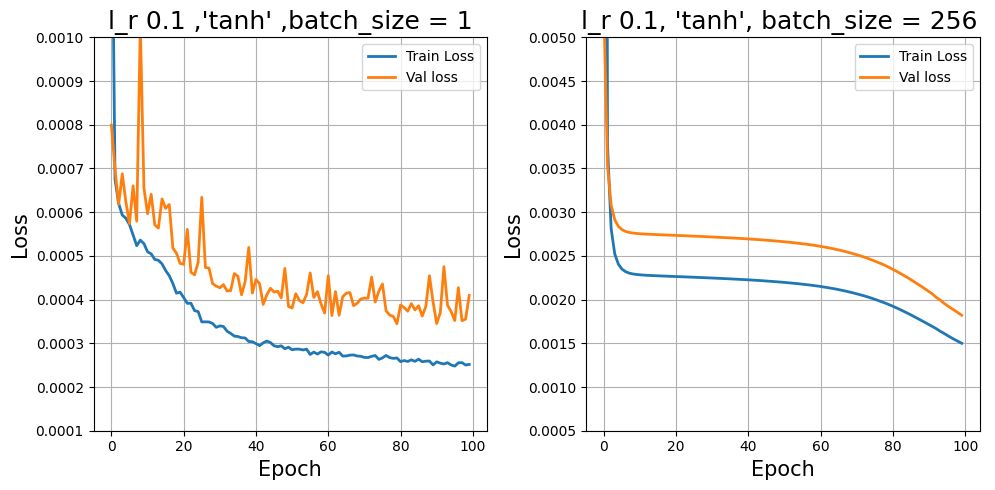

In [30]:
fig3 , ax3 = plt.subplots(1,2,figsize = (10,5))
ax3 = ax3.flatten()
ax3[0].set_title(f"l_r 0.1 ,'tanh' ,batch_size = 1")
ax3[0].set_xlabel("Epoch")
ax3[0].set_ylabel("Loss")
ax3[0].plot(epoch_tanh_1 , loss_tanh_1 , label = 'Train Loss')
ax3[0].plot(epoch_tanh_1 , val_loss_tanh_1, label = 'Val loss') 
ax3[0].legend()
ax3[0].set_ylim([0.0001,0.001])
ax3[1].set_title(f"l_r 0.1, 'tanh', batch_size = 256 ")
ax3[1].plot(epoch_tanh_256 , loss_tanh_256 , label = 'Train Loss')
ax3[1].plot(epoch_tanh_256 , val_loss_tanh_256, label = 'Val loss') 
ax3[1].legend()
ax3[1].set_xlabel("Epoch")
ax3[1].set_ylabel("Loss")
ax3[1].set_ylim([0.0005,0.005])
plt.show()